This is an example notebook and is not designed to reproduce any particular result. Feel free to adapt it for your own use.

In [1]:
#import os
import matplotlib.pyplot as plt
import numpy as np
import pybamm
import pandas as pd
import timeit
start = timeit.default_timer()
#os.chdir(pybamm.__path__[0]+'/..')
# pybamm.set_logging_level("INFO")

In [2]:
model = pybamm.lithium_ion.DFN(
    options={
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "loss of active material": "stress-driven",
        "lithium plating": "partially reversible"
    }
)

In [3]:
param = pybamm.ParameterValues("OKane2023")
# Adjust SEI parameters
param.update({"Inner SEI lithium interstitial diffusivity [m2.s-1]": 3e-19})
# Override SEI thickness dependence of lithium plating
param.update({"Dead lithium decay rate [s-1]": 1e-6})
param.update({"Lithium plating kinetic rate constant [m.s-1]": 1e-10})
# Adjust mechanical degradation parameters
param.update({"Negative electrode cracking rate": 1e-22})
param.update({"Negative electrode LAM constant proportional term [s-1]": 1e-9})
param.update({"Positive electrode LAM constant proportional term [s-1]": 1e-9})

In [4]:
# C/10 discharge/charge run at start and after every 78 ageing cycles 
exp = pybamm.Experiment(
    [("Hold at 4.2V until C/100", "Rest for 4 hours (5 minute period)"),] +  # Formation "cycle" run once only
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 78 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.1C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),]
)

In [5]:
var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 20,  # positive particle
}

In [6]:
sim1 = pybamm.Simulation(
    model, 
    experiment=exp,
    parameter_values=param,
    solver=pybamm.CasadiSolver(),
    var_pts=var_pts,
)
solution1 = sim1.solve(
    save_at_cycles=[1,2,81,160,239,318,397,476,555,634,713,792,871,950,1029,1108,1187]  # Only save C/10 evaluation cycles to save RAM
)

stop = timeit.default_timer()
print('running time: ' + str(stop - start) +'s')

At t = 0.00535566 and h = 1.13967e-015, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0052392 and h = 5.69304e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0051261 and h = 5.92937e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00501605 and h = 4.07996e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00490884 and h = 6.36731e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00490883 and h = 7.37989e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00480425 and h = 2.57936e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00480422 and h = 9.14266e-016, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0047019 and h = 3.58121e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00470207 and h = 5.63018e-016, the corrector convergence f

running time: 20186.9035281s


In [7]:
import os
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2_R8_FromSimon'; 
Target  = '/Test_SimonNotebook/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target);
path = BasicPath + Target
# solution1.save(path+'coupled_degradation_prelim.pkl')

In [10]:
N_cycles = solution1.summary_variables["Cycle number"]
Q_sei = solution1.summary_variables["Loss of capacity to SEI [A.h]"]
Q_sei_cracks = solution1.summary_variables["Loss of capacity to SEI on cracks [A.h]"]
Q_plating = solution1.summary_variables["Loss of capacity to lithium plating [A.h]"]
Q_side = solution1.summary_variables["Total capacity lost to side reactions [A.h]"]
LAM_neg = solution1.summary_variables["Loss of active material in negative electrode [%]"]
LAM_pos = solution1.summary_variables["Loss of active material in positive electrode [%]"]

In [13]:
len(solution1.cycles)

644

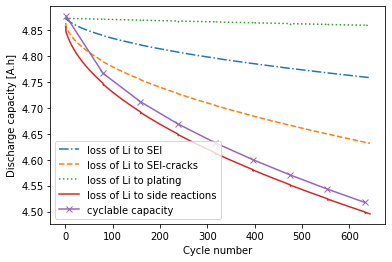

In [17]:
N_cycles_RPT = []
N_cycles_RPT.append(2)
Q_throughput_RPT = []
Q_dis_RPT = []
Qdis = solution1.cycles[1].steps[0]["Discharge capacity [A.h]"].entries
Qdis_delta = Qdis[-1] - Qdis[0]
Q_dis_RPT.append(Qdis_delta)
Qt = solution1.cycles[1].steps[0]["Throughput capacity [A.h]"].entries
Q_throughput_RPT.append(Qt[-1])
for i in range(8):
    Qdis = solution1.cycles[79*i+80].steps[0]["Discharge capacity [A.h]"].entries
    Qdis_delta = Qdis[-1] - Qdis[0]
    Q_dis_RPT.append(Qdis_delta)
    Qt = solution1.cycles[79*i+80].steps[0]["Throughput capacity [A.h]"].entries
    Q_throughput_RPT.append(Qt[-1])
    N_cycles_RPT.append(79*i+80)
plt.figure()
plt.plot(N_cycles, Q_dis_RPT[0]-Q_sei, label="loss of Li to SEI", linestyle="dashdot")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_sei_cracks, label="loss of Li to SEI-cracks", linestyle="dashed")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_plating, label="loss of Li to plating", linestyle="dotted")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_side, label="loss of Li to side reactions")
plt.plot(N_cycles_RPT, Q_dis_RPT, label="cyclable capacity", marker="x")
plt.xlabel("Cycle number")
plt.ylabel("Discharge capacity [A.h]")
plt.legend()
filename = path+'Nonlinear_diffusion_v4.pdf'
plt.savefig(filename,bbox_inches='tight')
plt.show()

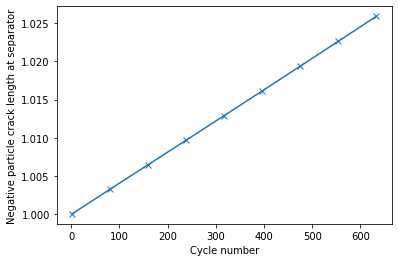

In [18]:
#check the crack doesn't go all the way into the centre!
l_cr = []
lcr = solution1.cycles[1]["Negative particle crack length"].entries[-1,-1]
l_cr.append(lcr)
for i in range(8):
    lcr = solution1.cycles[79*i+80]["Negative particle crack length"].entries[-1,-1]
    l_cr.append(lcr)
plt.figure()
plt.plot(N_cycles_RPT,l_cr,marker="x")
plt.xlabel("Cycle number")
plt.ylabel("Negative particle crack length at separator")
plt.show()